In [741]:
#Actividad Actividad 2 - Búsqueda y sistemas basados en reglas
#Estudiantes
#Krhistian Alejandro Gonzalez Duarte
#Wilson Merardo Cañon

#Importando Librerias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

In [742]:
#Importando Bd
url = 'https://raw.githubusercontent.com/1Alejo31/IA_Ibero/master/Forbes-Global-2000-List-2023-Someka-Excel-Template-V1.csv'
#Procesando la bd
df = pd.read_csv(url, delimiter=';', encoding='utf-8')
#Mostrando los primeros 5 registros
df.head()

,Rank,Company Name,Country,Sales\n($millions),Profits\n($millions),Assets\n($millions),Market Value \nAs of 05/05/23 ($m)
0,1,JPMorgan Chase,United States,$179.930,$41.800,$3.744.300,$399.590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$589.470,$156.360,$660.990,$2.055.220
2,3,ICBC,China,$216.770,$52.470,$6.116.820,$203.010
3,4,China Construction Bank,China,$203.080,$48.250,$4.977.480,$172.990
4,5,Agricultural Bank of China,China,$186.140,$37.920,$5.356.860,$141.820


In [743]:
#Obteniendo el numero de registros y de columnas
print(df.shape)
print()
#Obteniendo los nombres de las columnas a trabajar
print(df.columns)

(2000, 7)

Index(['Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/05/23 ($m)'],
      dtype='object')


In [744]:
#Buscando si hay valores nulos
hayNulos = df.isnull().any().any()

if hayNulos:
    print('Se encontraron valores nulos en df')
else:
    print('No se encontraron valores nulos')    

No se encontraron valores nulos


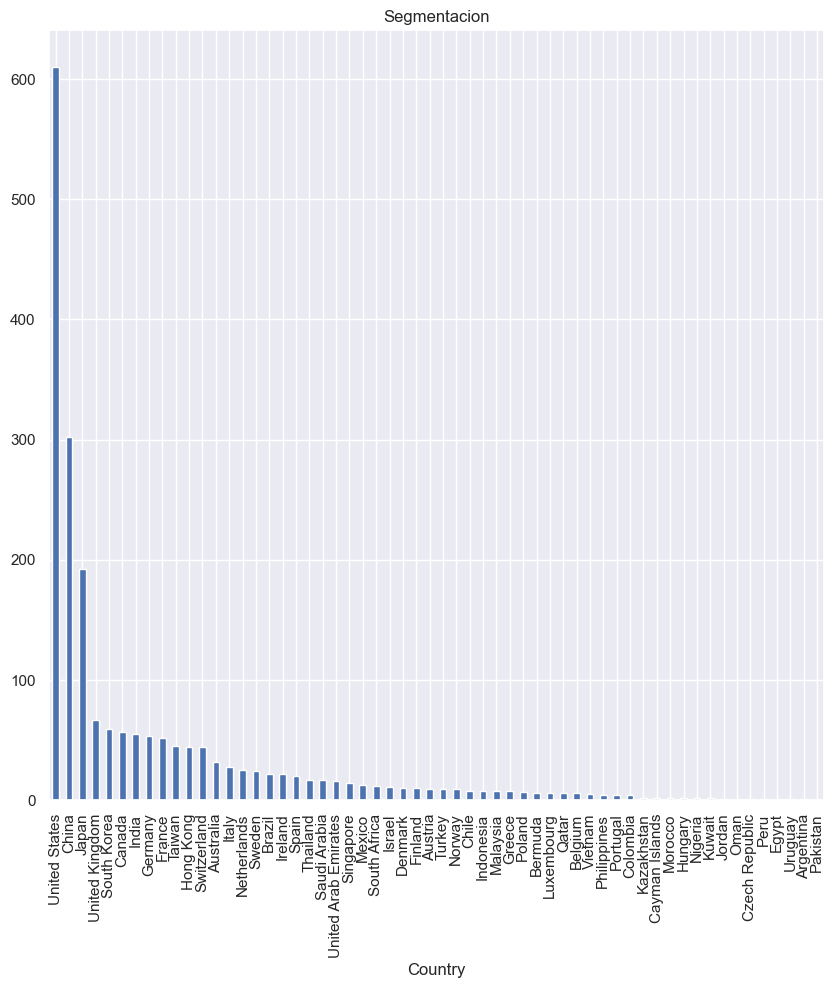

In [745]:
#Configurando el tamaño de la grafica
plt.figure(figsize=(10, 10))
#Se crea un grafico de barras para poder ver la informacion de forma legible
df['Country'].value_counts().plot(kind='bar')
#Agregando titulo a la grafica
plt.title('Segmentacion')
#Mostrar la grafica
plt.show()

In [746]:
#Realizando conteo de los paises
df['Country'].value_counts()

Country
United States           610
China                   302
Japan                   192
United Kingdom           67
South Korea              59
Canada                   57
India                    55
Germany                  53
France                   52
Taiwan                   45
Hong Kong                44
Switzerland              44
Australia                32
Italy                    28
Netherlands              25
Sweden                   24
Brazil                   22
Ireland                  22
Spain                    20
Thailand                 17
Saudi Arabia             17
United Arab Emirates     16
Singapore                14
Mexico                   13
South Africa             12
Israel                   11
Denmark                  10
Finland                  10
Austria                   9
Turkey                    9
Norway                    9
Chile                     8
Indonesia                 8
Malaysia                  8
Greece                    8
Poland      

In [747]:
# Seleccionar columnas de tipo cadena
columnas_desde_la_tercera = df.columns[3:]

# Limpiar y convertir columnas de tipo cadena a números flotantes
for columna in columnas_desde_la_tercera:
    df[columna] = df[columna].str.replace('[\$,]', '', regex=True)
    # Convierte y trata los errores como NaN
    df[columna] = pd.to_numeric(df[columna], errors='coerce') 

df

,Rank,Company Name,Country,Sales\n($millions),Profits\n($millions),Assets\n($millions),Market Value \nAs of 05/05/23 ($m)
0,1,JPMorgan Chase,United States,179.93,41.80,NaN,399.59
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.47,156.36,660.99,NaN
2,3,ICBC,China,216.77,52.47,NaN,203.01
3,4,China Construction Bank,China,203.08,48.25,NaN,172.99
4,5,Agricultural Bank of China,China,186.14,37.92,NaN,141.82
...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5.35,490.00,7.82,15.60
1996,1996,Gap,United States,15.62,-202.00,11.39,3.17
1997,1996,Yes Bank,India,3.34,92.00,43.22,5.60
1998,1999,BEKB-BCBE,Switzerland,556.00,167.00,42.97,2.49


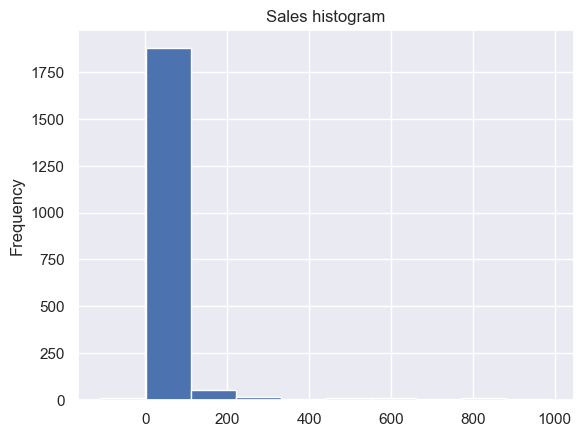

In [748]:
#Se realiza analisis de ventas

x = df['Sales\n($millions)'].plot(kind='hist')
plt.title('Sales histogram')
plt.show()

In [749]:
# Filtrar las filas para incluir solo "United States" y "China"
df_filtered = df[df['Country'].isin(['United States', 'China'])].copy()  # Crear una copia del subconjunto

# Mapear los valores de la columna 'Country' a 1 para "United States" y 0 para "China"
df_filtered['Country'] = df_filtered['Country'].map({"United States": 1, "China": 0})

# Verificar el DataFrame resultante
df_filtered.value_counts()

Rank  Company Name          Country  Sales\n($millions)  Profits\n($millions)  Assets\n($millions)  Market Value \nAs of 05/05/23 ($m)
8     ExxonMobil            1        393.16               61.69                369.37               439.39                                1
1336  DXC Technology        1        14.85                718.00               18.25                5.17                                  1
1301  ZTO Express (Cayman)  0        5.26                 1.00                 11.30                22.23                                 1
1302  Vipshop Holdings      0        15.30                927.00               9.42                 7.57                                  1
1303  IDEXX Laboratories    1        3.43                 699.00               2.81                 40.55                                 1
                                                                                                                                         ..
690   Ally Financial     

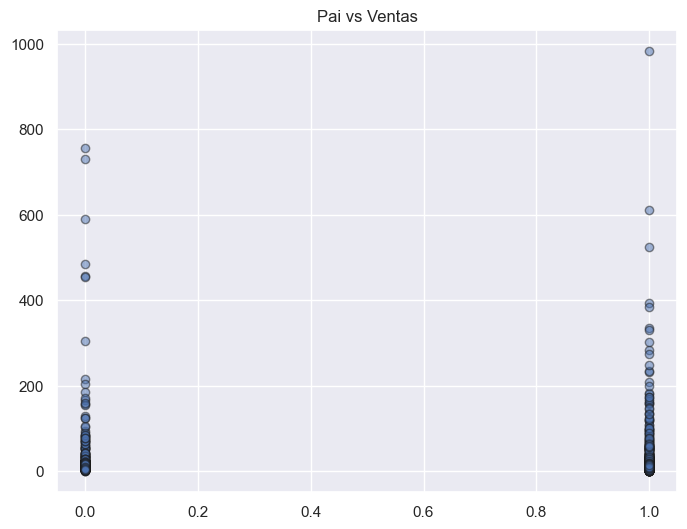

In [750]:
plt.figure(figsize=(8, 6))
plt.title('Pai vs Ventas')
plt.scatter(x= df_filtered['Country'], y =  df_filtered['Sales\n($millions)'], alpha=0.5, c='b', edgecolors='k')
plt.show()

In [751]:
# Eliminar las columnas no numéricas del DataFrame
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación en las columnas numéricas
correlation_matrix = df_numeric.corr()

correlation_matrix

,Rank,Sales\n($millions),Profits\n($millions),Assets\n($millions),Market Value \nAs of 05/05/23 ($m)
Rank,1.000000,-0.055341,0.353725,-0.448469,-0.116667
Sales\n($millions),-0.055341,1.000000,-0.116181,0.144522,0.333382
Profits\n($millions),0.353725,-0.116181,1.000000,-0.195210,-0.162465
Assets\n($millions),-0.448469,0.144522,-0.195210,1.000000,0.093337
Market Value \nAs of 05/05/23 ($m),-0.116667,0.333382,-0.162465,0.093337,1.000000


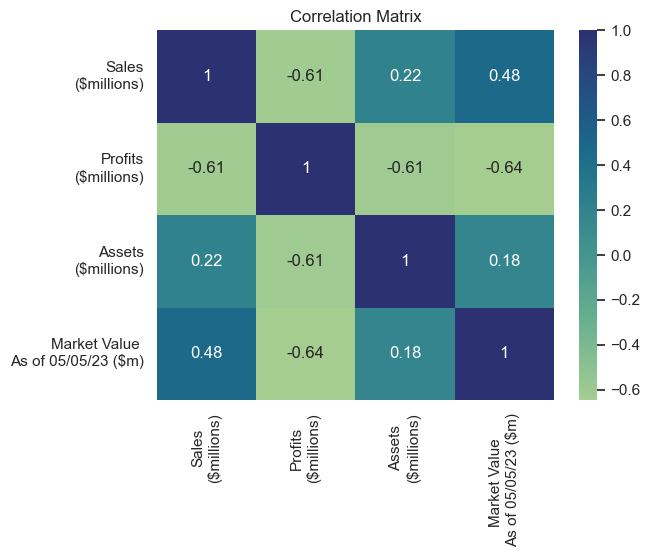

In [752]:
# Heatmap of correlation matrix

sns.heatmap(correlation_matrix.iloc[:, 1:].corr(), annot = True, cmap = "crest")
plt.title('Correlation Matrix')
plt.show()

In [754]:
#Cluster
dfCluster = df[['Sales\n($millions)', 'Profits\n($millions)']]

In [756]:
#Implementando
kmeand_model = KMeans(n_clusters=2, init='k-means++', random_state=0)

In [758]:
y = kmeand_model.fit_predict(dfCluster)


C:\Users\alejo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [759]:
pd.Series(y).value_counts()

0    1337
1     663
Name: count, dtype: int64

In [760]:
kmeand_model.cluster_centers_

array([[ 50.54580404,   5.03377711],
       [ 14.6014178 , 669.28657617]])

In [761]:
df = pd.DataFrame(df)
df['cluster'] = y
df

#Procesode clusterizacion

,Rank,Company Name,Country,Sales\n($millions),Profits\n($millions),Assets\n($millions),Market Value \nAs of 05/05/23 ($m),cluster
0,1,JPMorgan Chase,United States,179.93,41.80,NaN,399.59,0
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.47,156.36,660.99,NaN,0
2,3,ICBC,China,216.77,52.47,NaN,203.01,0
3,4,China Construction Bank,China,203.08,48.25,NaN,172.99,0
4,5,Agricultural Bank of China,China,186.14,37.92,NaN,141.82,0
...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5.35,490.00,7.82,15.60,1
1996,1996,Gap,United States,15.62,-202.00,11.39,3.17,0
1997,1996,Yes Bank,India,3.34,92.00,43.22,5.60,0
1998,1999,BEKB-BCBE,Switzerland,556.00,167.00,42.97,2.49,0
